# 실습 과제
### 과제 1: 회귀 분석
목표: 특정 변수에 대한 선형 회귀 모델을 구축하고 평가합니다.

데이터셋: California Housing dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, MSE와 R^2 점수를 계산합니다.
5. 실제 값과 예측 값을 시각화합니다.

In [5]:
# 라이브러리 임포트
import numpy as np  # 수치 계산을 위한 라이브러리
import pandas as pd # 데이터 조작 및 분석을 위한 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns   #시각화 고급 라이브러리
from sklearn.linear_model import LinearRegression   # 선형 회귀 모델을 위한 클래스
from sklearn.model_selection import train_test_split    # 데이터를 훈련/테스트 세트로 분할하기 위한 함수
from sklearn.metrics import mean_squared_error, r2_score    # 모델 성능 평가를 위한 함수(MSE, R^2)

#데이터 생성( 캘리포니아 주택 가격 데이터)
from sklearn.datasets import fetch_california_housing

In [56]:
# 데이터 로드
california = fetch_california_housing()

# 특성과 목표 변수를 포함한 데이터프레임 생성
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target
# 데이터 확인
print(f"데이터셋의 처음 몇줄:\n{df.head()}")
print(f"데이터셋의 요약:\n {df.describe()}")
print(f"데이터셋의 요약:\n {df.info()}")
print(f"데이터의 결측치:\n{df.isna().sum()}")

데이터셋의 처음 몇줄:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
데이터셋의 요약:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000  

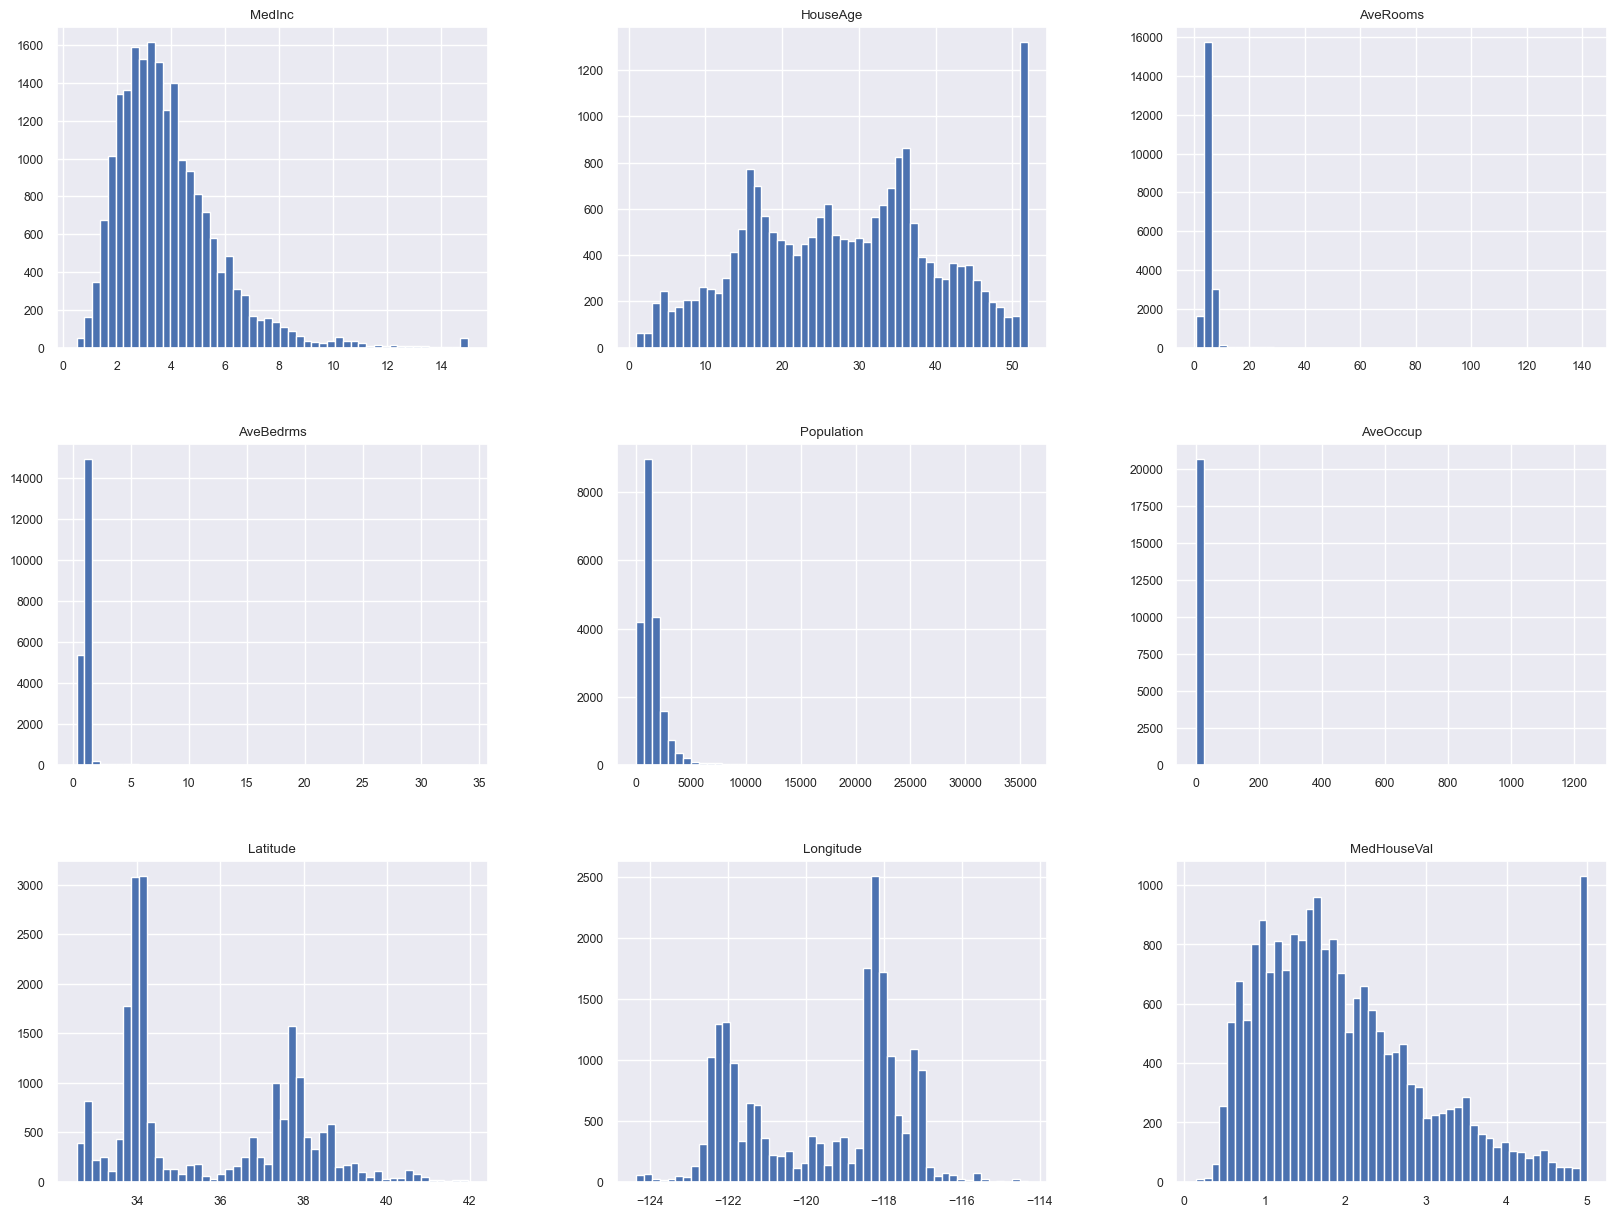

In [55]:
%matplotlib inline
# 데이터 시각화
# 히스토그램


df.hist(bins=50, figsize=(20,15))
plt.show()

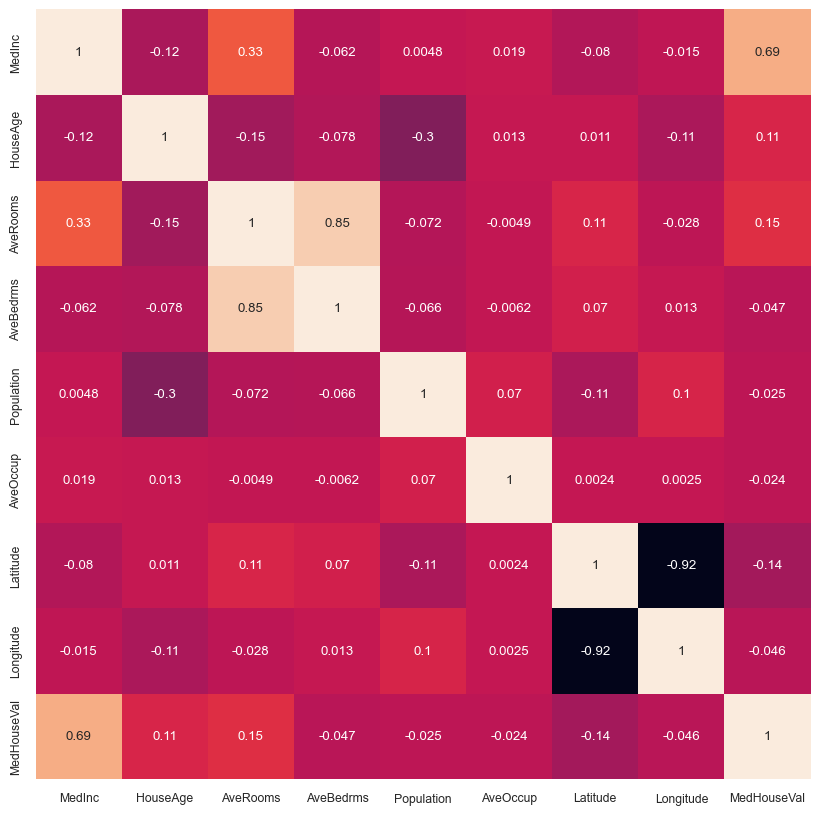

In [39]:
# 상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [42]:
# Target 변수롸 상관관계가 높은 순으로 출력
target_corr = df_corr['MedHouseVal']

corr_order = target_corr.abs().sort_values(ascending=False)
print(f'MedHouseVal와 상관관계가 높은 특성 나열{corr_order}')


MedHouseVal와 상관관계가 높은 특성 나열MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
Latitude       0.144160
HouseAge       0.105623
AveBedrms      0.046701
Longitude      0.045967
Population     0.024650
AveOccup       0.023737
Name: MedHouseVal, dtype: float64


In [46]:
# 시각화로 분석할 피처 선택 추출
plot_cols=['MedHouseVal','MedInc','AveRooms','Latitude']
plot_df=df.loc[:,plot_cols]
plot_df.head()

,MedHouseVal,MedInc,AveRooms,Latitude
0,4.526,8.3252,6.984127,37.88
1,3.585,8.3014,6.238137,37.86
2,3.521,7.2574,8.288136,37.85
3,3.413,5.6431,5.817352,37.85
4,3.422,3.8462,6.281853,37.85


In [33]:
# 특성(X)과 목표 변수(y) 설정
X = df.drop('MedHouseVal', axis = 1)
y = df['MedHouseVal']

In [15]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(f"len(X_train):{len(X_train)}")

# 모델 학습
lin_reg = LinearRegression()    #선형 회귀 모델 생성
lin_reg.fit(X_train,y_train)    #훈련 세트를 사용하여 선형 회귀 모델 학습
# 예측
y_pred = lin_reg.predict(X_test)
# 평가
print(y_pred)

len(X_train):16512
[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


In [35]:
# 평가
# MSE(평균 제곱 오차)
"""
평균 제곱 오차는 예측 값과 실제 값의 차이를 제곱을 평균한 값
값이 작을수록 모델의 예측이 실제 값에 가까움
"""
mse = mean_squared_error(y_test,y_pred)

#R2 score(결정 계수)
"""
결정 계수는 모델이 데이터이 변동성을 얼마나 설명하는지를 나타내는 지표
1에 가까울수록 모델이 데이터를 잘 설명한다는 것을 의미
"""
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Accuracy:{100-mse}")

Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508
Accuracy:99.44410840130476


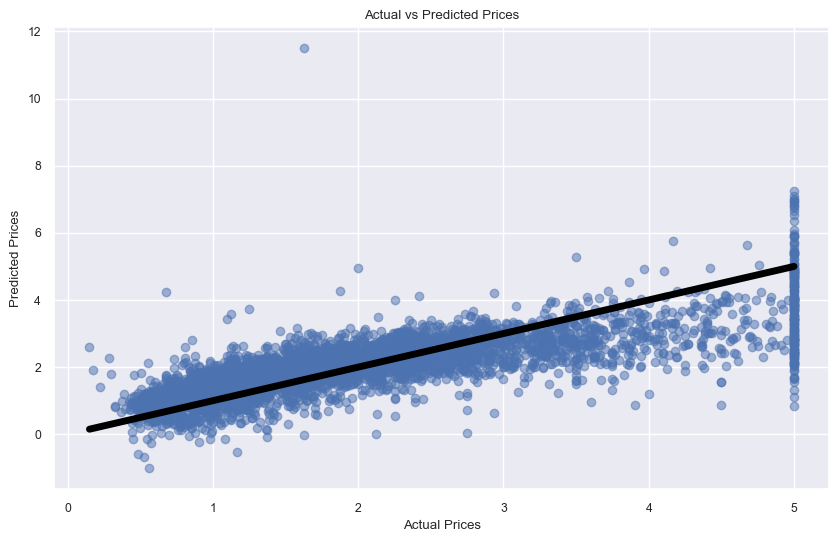

In [62]:
# 시각화
# Actual Prices vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', lw = 5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### 과제 2: 분류 분석
목표: 특정 데이터에 대한 나이브 베이즈 분류 모델을 구축하고 평가합니다.

데이터셋: Wine dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 나이브 베이즈 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, 정확도와 혼동 행렬을 계산합니다.
5. 혼동 행렬을 시각화합니다.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # 나이브 베이즈 모델(연속 데이터)
from sklearn.metrics import accuracy_score, confusion_matrix    #정확도, 혼동 행렬


from sklearn.datasets import load_wine

In [88]:
# 데이터 로드
wine = load_wine()
X = wine.data
y = wine.target

# 데이터프레임 생성
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['class'] = wine.target

print(f'데이터의 처음 몇줄:\n{df.head()}')
print(f'target의 value 값:\n {df["class"].unique()}')
print(f"Missing Value:\n{df.isnull().sum()}")


데이터의 처음 몇줄:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  


In [89]:


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
nb = GaussianNB()
nb.fit(X_train, y_train)

# 예측

y_pred = nb.predict(X_test)

# 평가
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)


print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix\n:{conf_matrix}")

Accuracy:1.0
Confusion Matrix
:[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


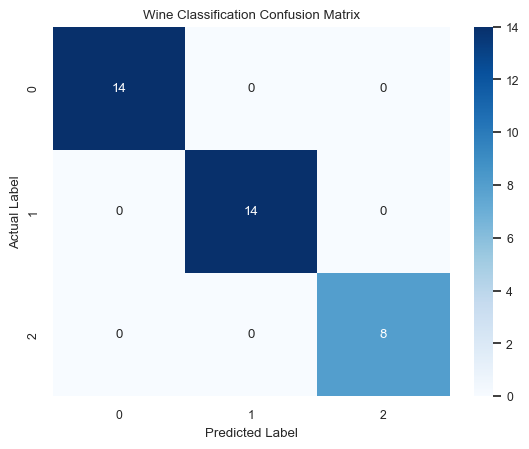

In [91]:
# 시각화
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Wine Classification Confusion Matrix")
plt.show()

###과제 3: 교차 검증

목표: 데이터에 대해 교차 검증을 수행하여 모델 성능을 평가합니다.
데이터셋: Diabetes dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 나이브 베이즈 모델을 사용하여 5-겹 교차 검증을 수행합니다.
3. 교차 검증 점수를 출력하고 평균 점수를 계산합니다.
4. 교차 검증 결과를 시각화합니다.


In [130]:
#라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_diabetes

In [131]:
# 데이터 로드
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

#DESCR 속성
print(diabetes['DESCR'])

# 데이터프레임 생성
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(f'데이터의 처음 몇줄:\n{df.head()}')
print(f"Missing Value:\n{df.isnull().sum()}")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

참고
https://prlabhotelshoe.tistory.com/45

In [141]:
# 모델 생성
nb = GaussianNB()

# 교차 검증 수행
scores = cross_val_score(nb, X, y, cv=5)

# 교차 검증 점수 출력 및 평균 점수 계산
print(f'Cross-validation scores: {scores}')
print(f'Mean CV Score: {np.mean(scores)}')

Cross-validation scores: [0.         0.         0.01136364 0.01136364 0.        ]
Mean CV Score: 0.004545454545454545


/opt/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


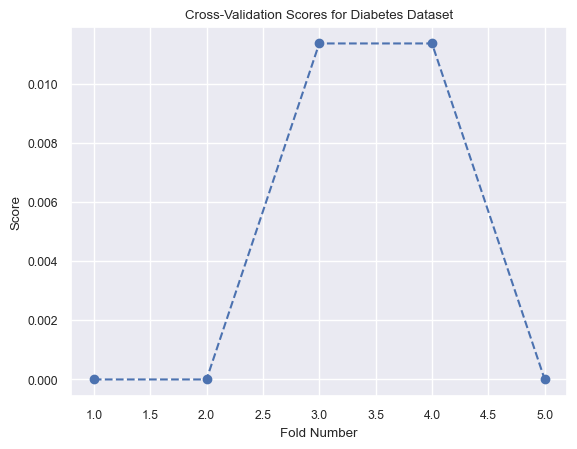

In [142]:
# 시각화
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--', color='b')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-Validation Scores for Diabetes Dataset')
plt.show()